In [21]:
import torch
from PIL import Image
import requests
from transformers import OneFormerProcessor, OneFormerModel

In [2]:
!pip install natten

In [22]:
processor = OneFormerProcessor.from_pretrained("shi-labs/oneformer_ade20k_swin_tiny")
model = OneFormerModel.from_pretrained("shi-labs/oneformer_ade20k_swin_tiny")

preprocessor_config.json:   0%|          | 0.00/8.71k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `OneFormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)


tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/84.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/203M [00:00<?, ?B/s]

In [20]:
image = Image.open("/content/IMG_0766.JPG")

In [23]:
inputs = processor(image, ["semantic"], return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

mask_predictions = outputs.transformer_decoder_mask_predictions
class_predictions = outputs.transformer_decoder_class_predictions

/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


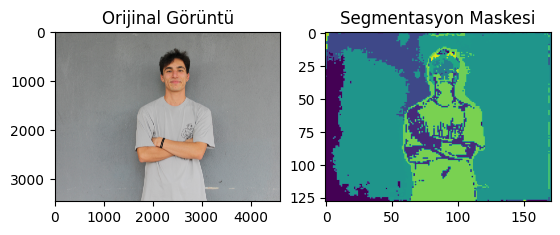

In [24]:
import matplotlib.pyplot as plt

mask_predictions = mask_predictions.argmax(dim=1).squeeze(0).cpu().numpy()

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Orijinal Görüntü")

plt.subplot(1, 2, 2)
plt.imshow(mask_predictions)
plt.title("Segmentasyon Maskesi")

plt.show()